In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def gaussian_kernel (size , sigma):
    if size % 2 == 0:
        size = size + 1

    max_point = size // 2 # both directions (x,y) maximum cell start point
    
    min_point = -max_point # both directions (x,y) minimumcell start point

    K = np. zeros (( size , size )) # kernel matrix
    for x in range ( min_point , max_point + 1):
        for y in range ( min_point , max_point + 1):
            value = (1/2*np.pi*sigma**2)*np.exp(-(x**2+y**2)/(2*sigma**2))
            K[x - min_point , y - min_point ] = value

    return K




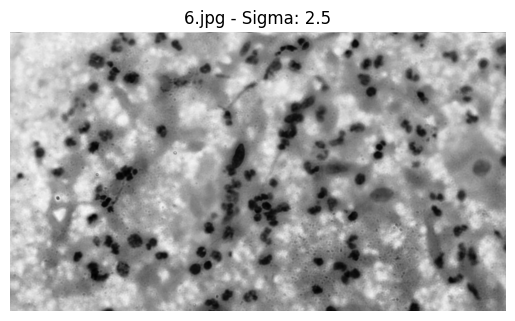

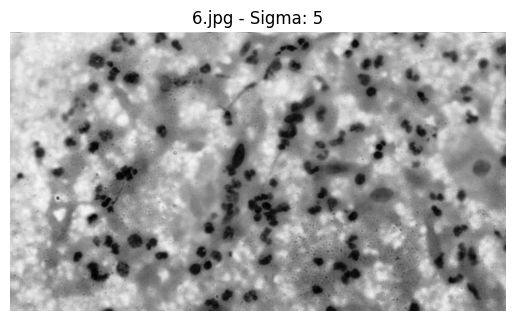

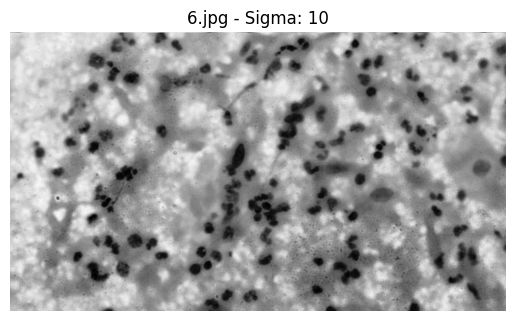

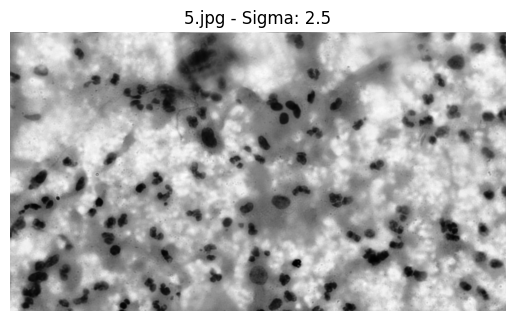

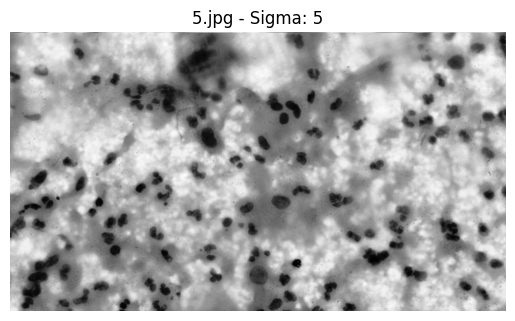

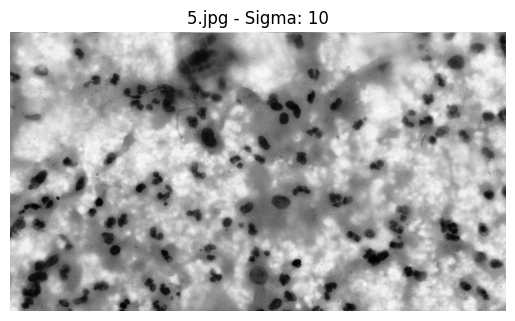

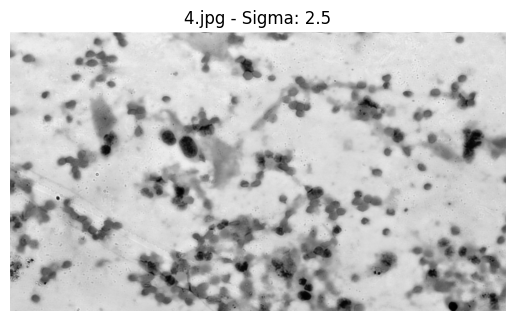

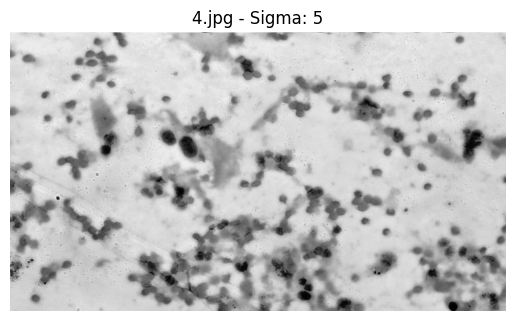

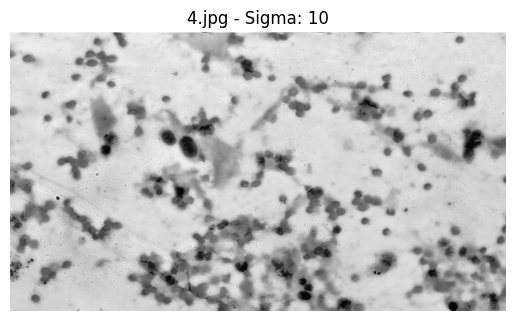

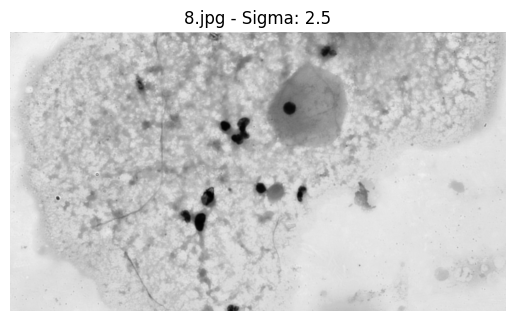

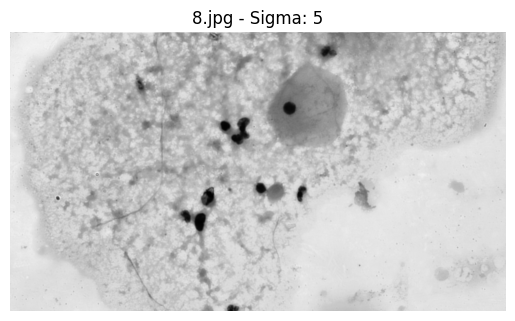

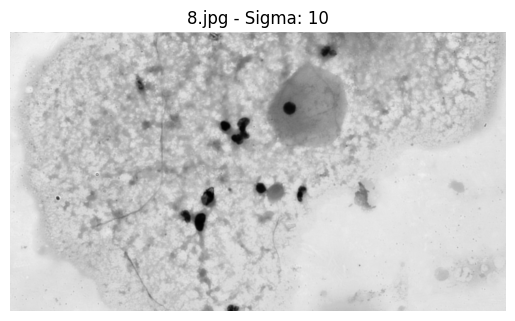

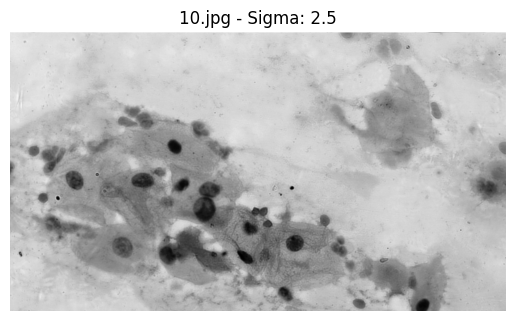

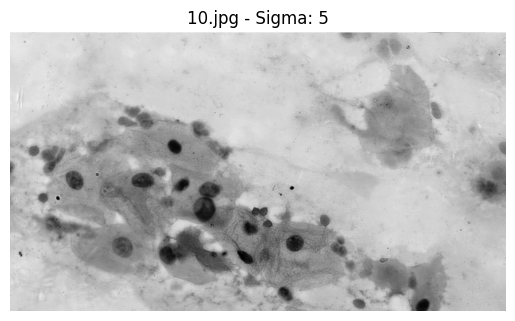

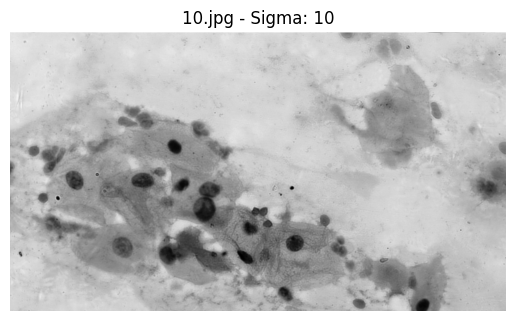

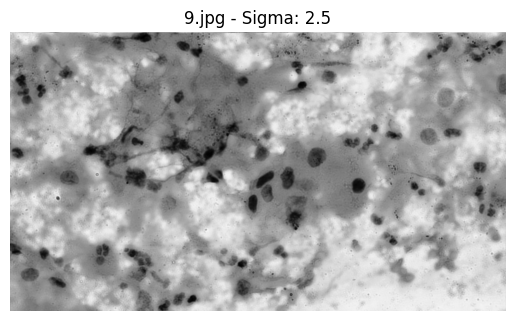

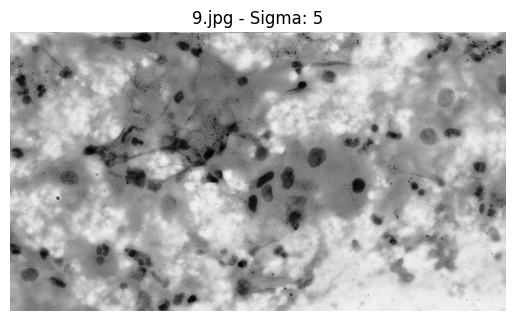

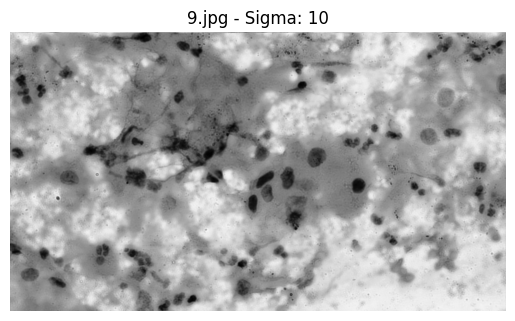

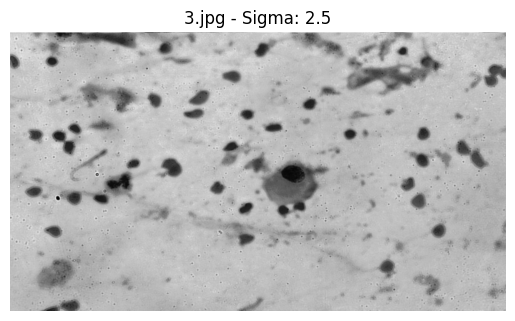

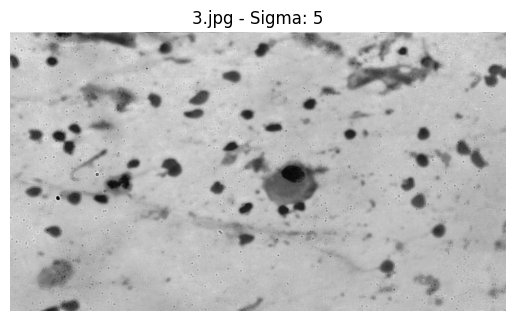

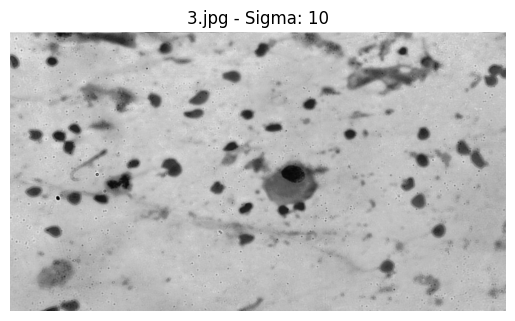

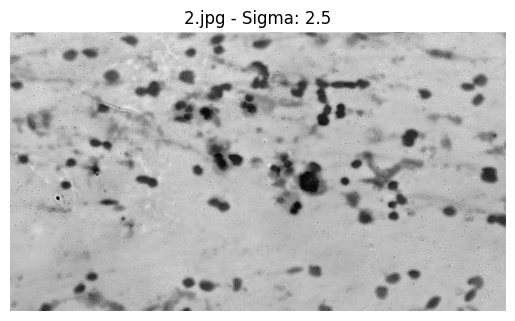

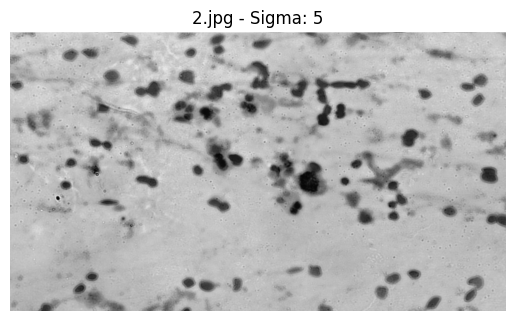

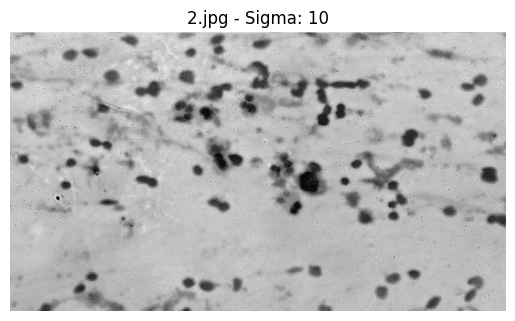

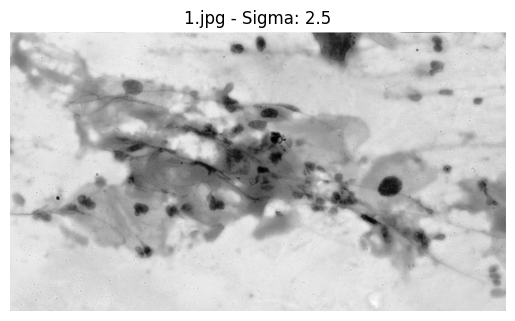

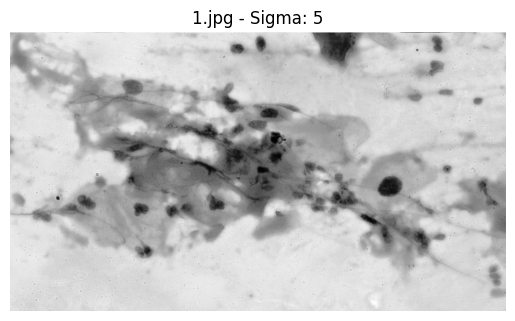

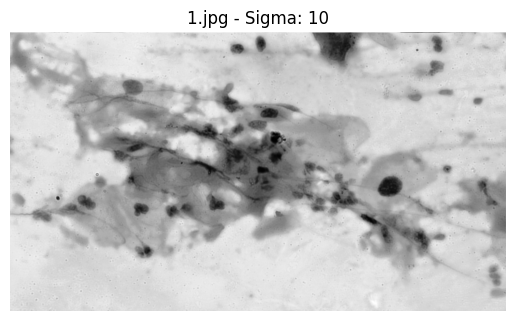

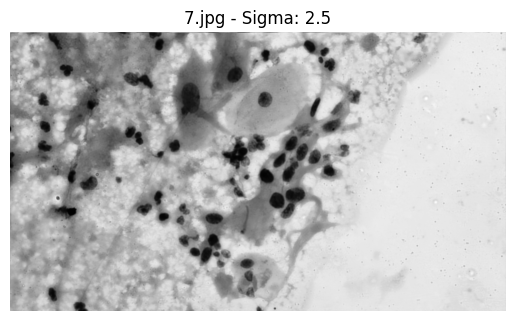

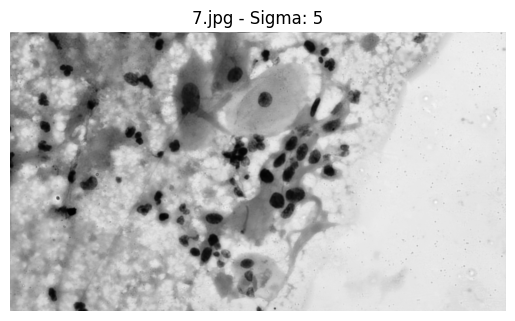

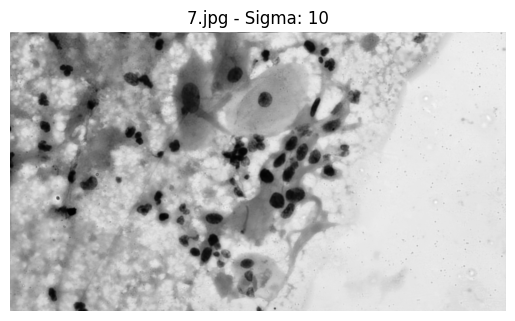

In [17]:
sigmas = [2.5, 5, 10]
folder_path = "/home/dangnhatminh92/Documents/AIO/AIO_2025/WARMING UP/Coding/Images"
for file_name in os.listdir(folder_path):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path, 0).astype(np.float64)

        for sigma in sigmas:
            kernel = gaussian_kernel(5, sigma)
            img_gaussian = cv2.filter2D(img, -1, kernel)


            # Hiển thị kết quả
            plt.figure()
            plt.title(f"{file_name} - Sigma: {sigma}")
            plt.imshow(img_gaussian, cmap='gray')
            plt.axis('off')
            plt.show()